In [2]:
%pip install tensorflow
%pip install ace_tools
!pip install opencv-python==4.8.1.78 numpy==1.24.4 matplotlib==3.7.1
!pip install mediapipe


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.8.1.78-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached numpy-1.24.4.tar.gz (10.9 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [33 lines of output]
  Traceback (most recent call last):
    File "D:\anaconda\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "D:\anaconda\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "D:\anaconda\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 112, in get_requires_for_build_wheel
      backend = _build_backend()
                ^^^^^^^^^^^^^^^^
    File "D:\anaconda\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 77, in _build_backend
      obj = import_module(mod_path)
            ^^^^^^^^^^^^^^^^^^^^^^^
    File "D:\anaconda\Lib\importlib\__init__.py",

Defaulting to user installation because normal site-packages is not writeable
INFO: pip is looking at multiple versions of opencv-contrib-python to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/51.0 MB ? eta -:--:--
    --------------------------------------- 0.8/51.0 MB 4.2 MB/s eta 0:00:12
   - -------------------------------------- 1.8/51.0 MB 4.8 MB/s eta 0:00:11
   -- ------------------------------------- 3.1/51.0 MB 5.3 MB/s eta 0:00:10
   --- ------------------------------------ 4.2/51.0 MB 5.2 MB/s eta 0:00:09
   --- ------------------------------------ 4.7/51.0 MB 5.3 MB/s eta 0:00:09
   --- ------------------------------------ 4.7/51.0 MB 5.3 MB/s eta 0:00:09
   ----- ---------------------------------- 6.6/51.0 MB 4.6 MB/s eta 0:00:10
   ----- ---------------------------------- 7.1/51.0 MB 4.5 MB/s eta 0:00:10
   ------ --------------------------------- 8.1/51.0 MB 4.5 MB/s eta 0:00:10
 

In [1]:
!pip install datasets transformers


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   -- ------------------------------------- 0.8/10.8 MB 4.2 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/10.8 MB 4.6 MB/s eta 0:00:02
   --------- ------------------------------ 2.6/10.8 MB 4.3 MB/s eta 0:00:02
   ------------ --------------------------- 3.4/10.8 MB 4.3 MB/s eta 0:00:02
   --------------- ------------------------ 4.2/10.8 MB 4.3 MB/s eta 0:00:02
   ------------------- -------------------- 5.2/10.8 MB 4.2 MB/s eta 0:00:02
   ---------------------- ----------------- 6.0/10.8 MB 4.2 MB/s eta 0:00:02
   ------------------------- -------------- 6.8/10.8 MB 4.2 MB/s eta 0:00:01
   ---------------------------- ----------- 7.6/10.8 MB 4.2 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/10.8 MB 4.2 MB/s eta 0:00:01
   ---------------------------------- ----- 9.4/10.8 MB 4.2 MB/s eta 0:00:01
   --

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## Détection

imports et définitions

In [2]:
# Section 1 – Imports & préparation
from datasets import load_dataset
import cv2, numpy as np, matplotlib.pyplot as plt
from random import sample

# Charger CelebA depuis Hugging Face
ds = load_dataset("flwrlabs/celeba", split="train")

# Fonctions utilitaires
def compute_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0]); yA = max(boxA[1], boxB[1])
    xB = min(boxA[0]+boxA[2], boxB[0]+boxB[2]); yB = min(boxA[1]+boxA[3], boxB[1]+boxB[3])
    inter = max(0, xB-xA)*max(0, yB-yA)
    areaA = boxA[2]*boxA[3]; areaB = boxB[2]*boxB[3]
    return inter / (areaA+areaB-inter+1e-6)

def show_image_with_boxes(img, gt=None, pred=None, title=""):
    img_disp = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Matplotlib attends RGB
    if gt:
        x,y,w,h = gt; cv2.rectangle(img_disp,(x,y),(x+w,y+h),(255,0,0),2)
    if pred:
        x,y,w,h = pred; cv2.rectangle(img_disp,(x,y),(x+w,y+h),(0,255,0),2)
    plt.imshow(cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB))
    plt.title(title); plt.axis("off"); plt.show()


README.md: 0.00B [00:00, ?B/s]

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

train-00000-of-00019.parquet:   0%|          | 0.00/500M [00:00<?, ?B/s]

train-00001-of-00019.parquet:   0%|          | 0.00/498M [00:00<?, ?B/s]

C:\Users\a\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:799: UserWarning: Not enough free disk space to download the file. The expected file size is: 494.12 MB. The target location C:\Users\a\.cache\huggingface\hub\datasets--flwrlabs--celeba\blobs only has 269.97 MB free disk space.
  warnings.warn(


train-00002-of-00019.parquet:   0%|          | 0.00/494M [00:00<?, ?B/s]

C:\Users\a\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:799: UserWarning: Not enough free disk space to download the file. The expected file size is: 490.43 MB. The target location C:\Users\a\.cache\huggingface\hub\datasets--flwrlabs--celeba\blobs only has 0.00 MB free disk space.
  warnings.warn(


train-00003-of-00019.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

OSError: [Errno 28] No space left on device

### initialisation

In [6]:
# Charger le dataset Olivetti
data = fetch_olivetti_faces()
images = data.images

# Sélectionner 5 images aléatoires
indices = [randint(0, len(images) - 1) for _ in range(5)]
images_test = [images[i] for i in indices]

# Simuler des boîtes ground truth (car le dataset ne les donne pas)
# On suppose le visage centré : (20, 20, 40, 40)
ground_truths = [(20, 20, 40, 40)] * 5


Fichier LBP utilisé : ./lbpcascade_frontalface.xml


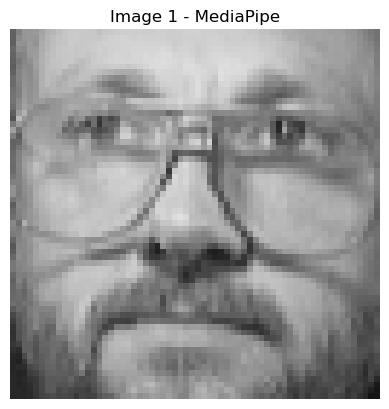

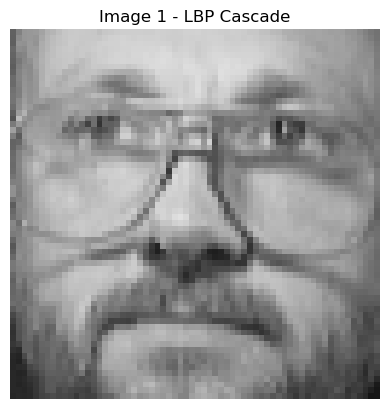

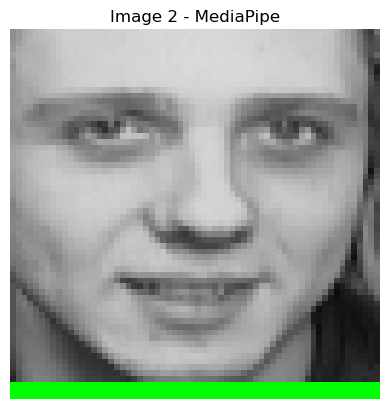

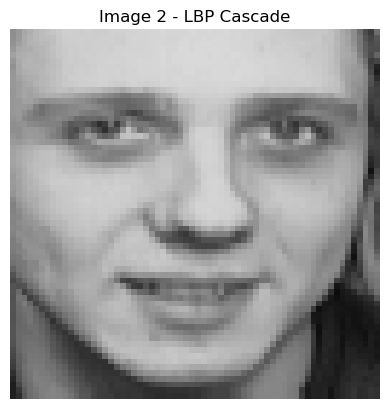

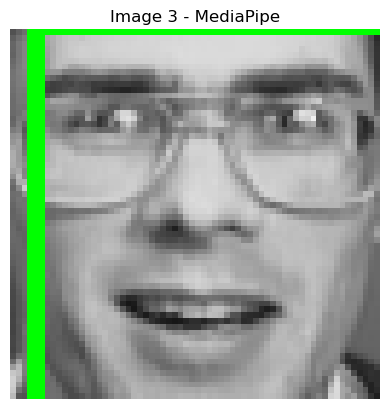

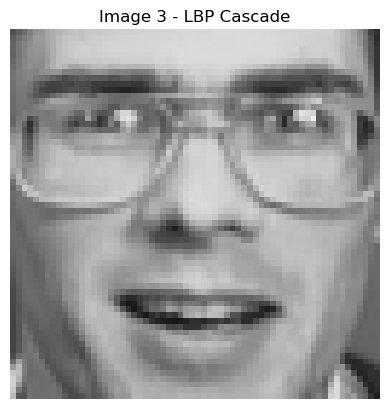

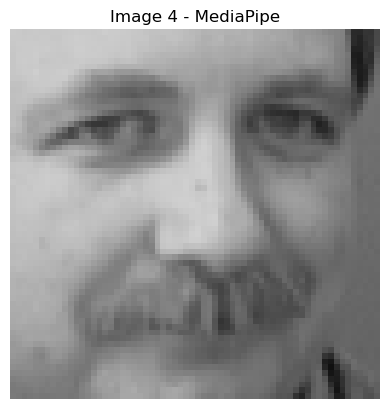

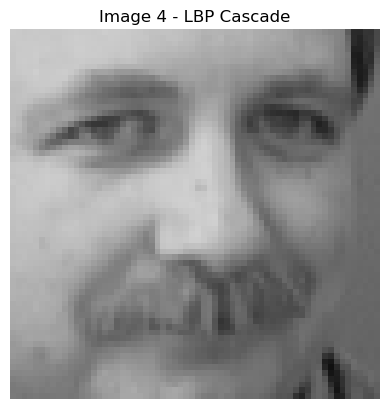

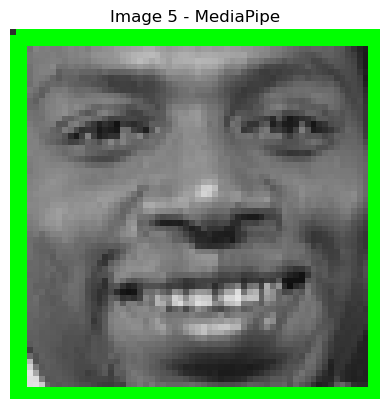

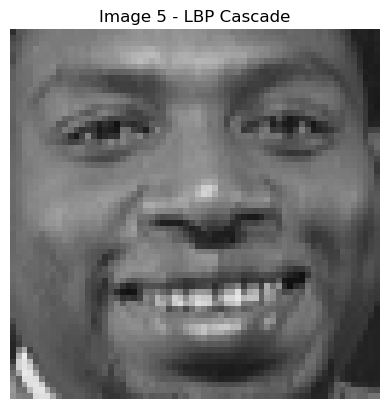

In [9]:
# Initialiser les détecteurs
mp_face = mp.solutions.face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5)

lbp_path = "./lbpcascade_frontalface.xml"
print("Fichier LBP utilisé :", lbp_path)

lbp_cascade = cv2.CascadeClassifier(lbp_path)
if lbp_cascade.empty():
    raise FileNotFoundError("Le fichier LBP Cascade n'existe pas dans ce chemin.")


results = []

for i, img in enumerate(images_test):
    h, w = img.shape
    img_bgr = cv2.cvtColor((img * 255).astype('uint8'), cv2.COLOR_GRAY2BGR)

    # === Détection MediaPipe ===
    mp_faces = []
    res = mp_face.process(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    if res.detections:
        for det in res.detections:
            box = det.location_data.relative_bounding_box
            x = int(box.xmin * w)
            y = int(box.ymin * h)
            ww = int(box.width * w)
            hh = int(box.height * h)
            mp_faces.append((x, y, ww, hh))

    # === Détection LBP ===
    lbp_faces = lbp_cascade.detectMultiScale((img * 255).astype('uint8'), scaleFactor=1.1, minNeighbors=5)

    # === Affichage ===
    show_boxes(img, mp_faces, f"Image {i+1} - MediaPipe", (0, 255, 0))
    show_boxes(img, lbp_faces, f"Image {i+1} - LBP Cascade", (255, 0, 0))

    # === IoU (premier visage détecté uniquement) ===
    gt = ground_truths[i]
    iou_mp = compute_iou(gt, mp_faces[0]) if mp_faces else 0.0
    iou_lbp = compute_iou(gt, lbp_faces[0]) if len(lbp_faces) > 0 else 0.0

    results.append({
        "Image": i+1,
        "IoU MediaPipe": round(iou_mp, 3),
        "IoU LBP Cascade": round(iou_lbp, 3),
        "MP Faces": len(mp_faces),
        "LBP Faces": len(lbp_faces)
    })


## Reconnaissance

D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricW

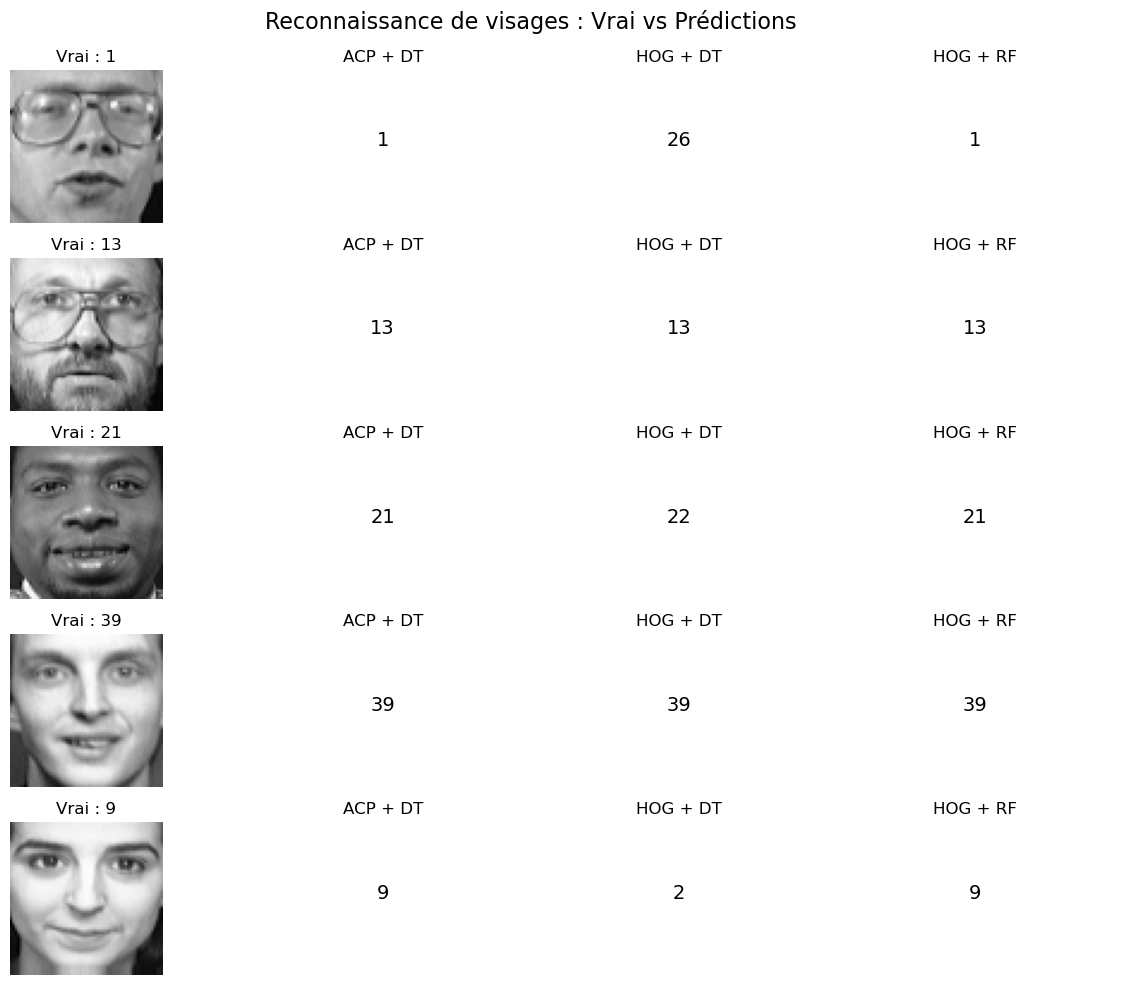

=== Évaluation des modèles ===
     Modèle  Accuracy  Precision (macro)  Recall (macro)  F1-score (macro)  \
0  ACP + DT  0.450000           0.473626        0.506654          0.445584   
1  HOG + DT  0.366667           0.363214        0.404583          0.339309   
2  HOG + RF  0.825000           0.849167        0.869226          0.828849   

   F1-score (CV)  
0       0.513464  
1       0.412202  
2       0.937000  


In [4]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from skimage.feature import hog

# Chargement du dataset
faces = fetch_olivetti_faces()
X, y = faces.images, faces.target
X_flat = X.reshape((X.shape[0], -1))  # (n_samples, 4096)

# Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.3, random_state=42)

# === 1. ACP + Decision Tree ===
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
clf_pca = DecisionTreeClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)

# === 2. Extraction HOG ===
def extract_hog(images):
    return np.array([
        hog(img.reshape(64, 64), pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
        for img in images
    ])

X_train_hog = extract_hog(X_train)
X_test_hog = extract_hog(X_test)

# === 3a. HOG + Decision Tree ===
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train_hog, y_train)
y_pred_dt = clf_dt.predict(X_test_hog)

# === 3b. HOG + Random Forest ===
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train_hog, y_train)
y_pred_rf = clf_rf.predict(X_test_hog)

# === 4. Évaluation sur le jeu de test ===
results = []
for name, y_pred in [("ACP + DT", y_pred_pca), ("HOG + DT", y_pred_dt), ("HOG + RF", y_pred_rf)]:
    results.append({
        "Modèle": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision (macro)": precision_score(y_test, y_pred, average='macro'),
        "Recall (macro)": recall_score(y_test, y_pred, average='macro'),
        "F1-score (macro)": f1_score(y_test, y_pred, average='macro')
    })


# === Visualisation pour 5 visages ===
num_faces = 5
indices = np.random.choice(len(X_test), num_faces, replace=False)
images = X_test[indices].reshape((num_faces, 64, 64))
true_labels = y_test[indices]

pred_pca = clf_pca.predict(X_test_pca[indices])
pred_dt = clf_dt.predict(X_test_hog[indices])
pred_rf = clf_rf.predict(X_test_hog[indices])

# === Affichage ===
fig, axs = plt.subplots(num_faces, 4, figsize=(12, 10))
fig.suptitle("Reconnaissance de visages : Vrai vs Prédictions", fontsize=16)

for i in range(num_faces):
    axs[i, 0].imshow(images[i], cmap='gray')
    axs[i, 0].axis('off')
    axs[i, 0].set_title(f"Vrai : {true_labels[i]}")
    
    axs[i, 1].text(0.5, 0.5, f"{pred_pca[i]}", fontsize=14, ha='center')
    axs[i, 1].set_title("ACP + DT")
    axs[i, 1].axis('off')
    
    axs[i, 2].text(0.5, 0.5, f"{pred_dt[i]}", fontsize=14, ha='center')
    axs[i, 2].set_title("HOG + DT")
    axs[i, 2].axis('off')
    
    axs[i, 3].text(0.5, 0.5, f"{pred_rf[i]}", fontsize=14, ha='center')
    axs[i, 3].set_title("HOG + RF")
    axs[i, 3].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# === 5. Validation croisée (5-fold) sur tout le dataset ===
X_pca_all = PCA(n_components=100).fit_transform(X_flat)
X_hog_all = extract_hog(X_flat)

cv_scores = {
    "ACP + DT (CV F1)": cross_val_score(DecisionTreeClassifier(random_state=42), X_pca_all, y, cv=5, scoring='f1_macro').mean(),
    "HOG + DT (CV F1)": cross_val_score(DecisionTreeClassifier(random_state=42), X_hog_all, y, cv=5, scoring='f1_macro').mean(),
    "HOG + RF (CV F1)": cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X_hog_all, y, cv=5, scoring='f1_macro').mean()
}

# Ajout des scores CV au tableau
for result in results:
    result["F1-score (CV)"] = cv_scores[result["Modèle"] + " (CV F1)"]

# Affichage des résultats
df_results = pd.DataFrame(results)
print("=== Évaluation des modèles ===")
print(df_results)
